In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from statsmodels.tsa.arima_model import ARMA, ARIMA
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
countries =['Series Description', 'Australia', 'Euro', 'NEWZEALAND', 'UK', 'Brazil', 'Canada', 'China', 'Denmark', 'Hong Kong', 'India', 'Japan','Korea','Malaysia','Mexico','Norway', 'Sweden','South Africa', 'Singapore', 'Sri Lanka', 'Switzerland', 'Taiwan', 'Thailand', 'Venezuela']
df=pd.read_csv('FRB_H10.csv', names = countries)

In [3]:
pd.set_option('display.max_columns', 999)
df

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
0,Series Description,"AUSTRALIA -- SPOT EXCHANGE RATE, US$/AUSTRALIA...",SPOT EXCHANGE RATE - EURO AREA,"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ (RE...","United Kingdom -- Spot Exchange Rate, US$/Poun...","BRAZIL -- SPOT EXCHANGE RATE, REAIS/US$","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","CHINA -- SPOT EXCHANGE RATE, YUAN/US$","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEA/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","Malaysia - Spot Exchange Rate, Ringgit/US$","MEXICO -- SPOT EXCHANGE RATE, PESOS/US$","NORWAY -- SPOT EXCHANGE RATE, KRONER/US$","SWEDEN -- SPOT EXCHANGE RATE, KRONOR/US$","SOUTH AFRICA -- SPOT EXCHANGE RATE, RAND/US$","Singapore - SPOT EXCHANGE RATE, SINGAPORE $/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$","SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$","TAIWAN -- SPOT EXCHANGE RATE, NT$/US$",THAILAND -- SPOT EXCHANGE RATE -- THAILAND,"VENEZUELA -- SPOT EXCHANGE RATE, BOLIVARES/US$"
1,Unit:,Currency:_Per_AUD,Currency:_Per_EUR,Currency:_Per_NZD,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD
2,Multiplier:,1,1,1,0.00999999978,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Currency:,USD,USD,USD,USD,BRL,CAD,CNY,DKK,HKD,INR,JPY,KRW,MYR,MXN,NOK,SEK,ZAR,SGD,LKR,CHF,TWD,THB,VEB
4,Unique Identifier:,H10/H10/RXI$US_N.M.AL,H10/H10/RXI$US_N.M.EU,H10/H10/RXI$US_N.M.NZ,H10/H10/RXI$US_N.M.UK,H10/H10/RXI_N.M.BZ,H10/H10/RXI_N.M.CA,H10/H10/RXI_N.M.CH,H10/H10/RXI_N.M.DN,H10/H10/RXI_N.M.HK,H10/H10/RXI_N.M.IN,H10/H10/RXI_N.M.JA,H10/H10/RXI_N.M.KO,H10/H10/RXI_N.M.MA,H10/H10/RXI_N.M.MX,H10/H10/RXI_N.M.NO,H10/H10/RXI_N.M.SD,H10/H10/RXI_N.M.SF,H10/H10/RXI_N.M.SI,H10/H10/RXI_N.M.SL,H10/H10/RXI_N.M.SZ,H10/H10/RXI_N.M.TA,H10/H10/RXI_N.M.TH,H10/H10/RXI_N.M.VE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
246,2020-01,0.6851,1.1098,0.6601,1.3076,4.1512,1.3089,6.9184,6.7339,7.7725,71.2790,109.2667,1167.4624,4.0785,18.8066,8.9615,9.5099,14.4136,1.3517,181.3219,0.9698,30.0200,30.4700,66616.9705
247,2020-02,0.6664,1.0911,0.6390,1.2953,4.3470,1.3286,6.9967,6.8469,7.7757,71.5295,110.0295,1195.3358,4.1625,18.8423,9.2957,9.6881,15.0244,1.3897,181.5016,0.9762,30.1574,31.3226,73360.9811
248,2020-03,0.6218,1.1046,0.6056,1.2369,4.8862,1.3960,7.0205,6.7646,7.7651,74.5482,107.6673,1218.1945,4.2958,22.3785,10.2403,9.8437,16.6761,1.4171,184.4095,0.9593,30.1305,32.0945,73313.7127
249,2020-04,0.6312,1.0871,0.6015,1.2420,5.3171,1.4048,7.0708,6.8638,7.7512,76.1682,107.7386,1223.1309,4.3493,24.1798,10.4199,10.0164,18.5651,1.4228,191.3536,0.9701,30.0732,32.6127,121810.0041


In [4]:
df.head(10)

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
0,Series Description,"AUSTRALIA -- SPOT EXCHANGE RATE, US$/AUSTRALIA...",SPOT EXCHANGE RATE - EURO AREA,"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ (RE...","United Kingdom -- Spot Exchange Rate, US$/Poun...","BRAZIL -- SPOT EXCHANGE RATE, REAIS/US$","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","CHINA -- SPOT EXCHANGE RATE, YUAN/US$","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEA/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","Malaysia - Spot Exchange Rate, Ringgit/US$","MEXICO -- SPOT EXCHANGE RATE, PESOS/US$","NORWAY -- SPOT EXCHANGE RATE, KRONER/US$","SWEDEN -- SPOT EXCHANGE RATE, KRONOR/US$","SOUTH AFRICA -- SPOT EXCHANGE RATE, RAND/US$","Singapore - SPOT EXCHANGE RATE, SINGAPORE $/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$","SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$","TAIWAN -- SPOT EXCHANGE RATE, NT$/US$",THAILAND -- SPOT EXCHANGE RATE -- THAILAND,"VENEZUELA -- SPOT EXCHANGE RATE, BOLIVARES/US$"
1,Unit:,Currency:_Per_AUD,Currency:_Per_EUR,Currency:_Per_NZD,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD
2,Multiplier:,1,1,1,0.00999999978,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Currency:,USD,USD,USD,USD,BRL,CAD,CNY,DKK,HKD,INR,JPY,KRW,MYR,MXN,NOK,SEK,ZAR,SGD,LKR,CHF,TWD,THB,VEB
4,Unique Identifier:,H10/H10/RXI$US_N.M.AL,H10/H10/RXI$US_N.M.EU,H10/H10/RXI$US_N.M.NZ,H10/H10/RXI$US_N.M.UK,H10/H10/RXI_N.M.BZ,H10/H10/RXI_N.M.CA,H10/H10/RXI_N.M.CH,H10/H10/RXI_N.M.DN,H10/H10/RXI_N.M.HK,H10/H10/RXI_N.M.IN,H10/H10/RXI_N.M.JA,H10/H10/RXI_N.M.KO,H10/H10/RXI_N.M.MA,H10/H10/RXI_N.M.MX,H10/H10/RXI_N.M.NO,H10/H10/RXI_N.M.SD,H10/H10/RXI_N.M.SF,H10/H10/RXI_N.M.SI,H10/H10/RXI_N.M.SL,H10/H10/RXI_N.M.SZ,H10/H10/RXI_N.M.TA,H10/H10/RXI_N.M.TH,H10/H10/RXI_N.M.VE
5,Time Period,RXI$US_N.M.AL,RXI$US_N.M.EU,RXI$US_N.M.NZ,RXI$US_N.M.UK,RXI_N.M.BZ,RXI_N.M.CA,RXI_N.M.CH,RXI_N.M.DN,RXI_N.M.HK,RXI_N.M.IN,RXI_N.M.JA,RXI_N.M.KO,RXI_N.M.MA,RXI_N.M.MX,RXI_N.M.NO,RXI_N.M.SD,RXI_N.M.SF,RXI_N.M.SI,RXI_N.M.SL,RXI_N.M.SZ,RXI_N.M.TA,RXI_N.M.TH,RXI_N.M.VE
6,2000-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
7,2000-02,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
8,2000-03,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
9,2000-04,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727


# Cleaning data

In [5]:
df[0:6]

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
0,Series Description,"AUSTRALIA -- SPOT EXCHANGE RATE, US$/AUSTRALIA...",SPOT EXCHANGE RATE - EURO AREA,"NEW ZEALAND -- SPOT EXCHANGE RATE, US$/NZ$ (RE...","United Kingdom -- Spot Exchange Rate, US$/Poun...","BRAZIL -- SPOT EXCHANGE RATE, REAIS/US$","CANADA -- SPOT EXCHANGE RATE, CANADIAN $/US$","CHINA -- SPOT EXCHANGE RATE, YUAN/US$","DENMARK -- SPOT EXCHANGE RATE, KRONER/US$","HONG KONG -- SPOT EXCHANGE RATE, HK$/US$","INDIA -- SPOT EXCHANGE RATE, RUPEES/US$","JAPAN -- SPOT EXCHANGE RATE, YEA/US$","KOREA -- SPOT EXCHANGE RATE, WON/US$","Malaysia - Spot Exchange Rate, Ringgit/US$","MEXICO -- SPOT EXCHANGE RATE, PESOS/US$","NORWAY -- SPOT EXCHANGE RATE, KRONER/US$","SWEDEN -- SPOT EXCHANGE RATE, KRONOR/US$","SOUTH AFRICA -- SPOT EXCHANGE RATE, RAND/US$","Singapore - SPOT EXCHANGE RATE, SINGAPORE $/US$","SRI LANKA -- SPOT EXCHANGE RATE, RUPEES/US$","SWITZERLAND -- SPOT EXCHANGE RATE, FRANCS/US$","TAIWAN -- SPOT EXCHANGE RATE, NT$/US$",THAILAND -- SPOT EXCHANGE RATE -- THAILAND,"VENEZUELA -- SPOT EXCHANGE RATE, BOLIVARES/US$"
1,Unit:,Currency:_Per_AUD,Currency:_Per_EUR,Currency:_Per_NZD,Currency:_Per_GBP,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD,Currency:_Per_USD
2,Multiplier:,1,1,1,0.00999999978,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
3,Currency:,USD,USD,USD,USD,BRL,CAD,CNY,DKK,HKD,INR,JPY,KRW,MYR,MXN,NOK,SEK,ZAR,SGD,LKR,CHF,TWD,THB,VEB
4,Unique Identifier:,H10/H10/RXI$US_N.M.AL,H10/H10/RXI$US_N.M.EU,H10/H10/RXI$US_N.M.NZ,H10/H10/RXI$US_N.M.UK,H10/H10/RXI_N.M.BZ,H10/H10/RXI_N.M.CA,H10/H10/RXI_N.M.CH,H10/H10/RXI_N.M.DN,H10/H10/RXI_N.M.HK,H10/H10/RXI_N.M.IN,H10/H10/RXI_N.M.JA,H10/H10/RXI_N.M.KO,H10/H10/RXI_N.M.MA,H10/H10/RXI_N.M.MX,H10/H10/RXI_N.M.NO,H10/H10/RXI_N.M.SD,H10/H10/RXI_N.M.SF,H10/H10/RXI_N.M.SI,H10/H10/RXI_N.M.SL,H10/H10/RXI_N.M.SZ,H10/H10/RXI_N.M.TA,H10/H10/RXI_N.M.TH,H10/H10/RXI_N.M.VE
5,Time Period,RXI$US_N.M.AL,RXI$US_N.M.EU,RXI$US_N.M.NZ,RXI$US_N.M.UK,RXI_N.M.BZ,RXI_N.M.CA,RXI_N.M.CH,RXI_N.M.DN,RXI_N.M.HK,RXI_N.M.IN,RXI_N.M.JA,RXI_N.M.KO,RXI_N.M.MA,RXI_N.M.MX,RXI_N.M.NO,RXI_N.M.SD,RXI_N.M.SF,RXI_N.M.SI,RXI_N.M.SL,RXI_N.M.SZ,RXI_N.M.TA,RXI_N.M.TH,RXI_N.M.VE


In [6]:
df=df.drop([0,1,2,3,4,5])


In [7]:
df.head()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
6,2000-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
7,2000-02,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
8,2000-03,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
9,2000-04,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727
10,2000-05,0.5784,0.9059,0.4708,1.5090,1.8278,1.4957,8.2781,8.2329,7.7907,44.0759,108.3205,1119.4864,3.8000,9.5059,9.0533,9.0925,7.0238,1.7286,74.8668,1.7190,30.7718,38.9514,0.6800


In [8]:
df.tail()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
246,2020-01,0.6851,1.1098,0.6601,1.3076,4.1512,1.3089,6.9184,6.7339,7.7725,71.2790,109.2667,1167.4624,4.0785,18.8066,8.9615,9.5099,14.4136,1.3517,181.3219,0.9698,30.0200,30.4700,66616.9705
247,2020-02,0.6664,1.0911,0.6390,1.2953,4.3470,1.3286,6.9967,6.8469,7.7757,71.5295,110.0295,1195.3358,4.1625,18.8423,9.2957,9.6881,15.0244,1.3897,181.5016,0.9762,30.1574,31.3226,73360.9811
248,2020-03,0.6218,1.1046,0.6056,1.2369,4.8862,1.3960,7.0205,6.7646,7.7651,74.5482,107.6673,1218.1945,4.2958,22.3785,10.2403,9.8437,16.6761,1.4171,184.4095,0.9593,30.1305,32.0945,73313.7127
249,2020-04,0.6312,1.0871,0.6015,1.2420,5.3171,1.4048,7.0708,6.8638,7.7512,76.1682,107.7386,1223.1309,4.3493,24.1798,10.4199,10.0164,18.5651,1.4228,191.3536,0.9701,30.0732,32.6127,121810.0041
250,2020-05,0.6517,1.0907,0.6087,1.2302,5.6394,1.3972,7.1016,6.8377,7.7519,75.6575,107.2000,1228.1340,4.3362,23.5240,10.0926,9.7286,18.1839,1.4178,187.5425,0.9692,29.9205,32.0805,181598.4850


In [9]:
df.describe()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
count,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245,245
unique,245,238,243,237,241,245,239,198,245,187,245,245,245,181,244,243,245,245,237,243,237,240,245,89
top,2018-04,0.7111,1.3646,0.7259,1.6158,3.2532,1.3286,8.2765,5.4585,7.8000,49.0168,117.0695,1169.3409,3.8000,11.0319,8.5855,9.0652,14.5868,1.3591,114.2836,0.9880,29.9900,41.1317,2.1446
freq,1,3,2,2,2,1,2,9,1,6,1,1,1,64,2,2,1,1,2,2,3,2,1,54


In [10]:
df.reset_index(inplace=True)
df=df.drop(columns='index')

In [11]:
df['Series Description']=pd.to_datetime(df['Series Description'], format='%Y-%m')

In [12]:
df.head()

,Series Description,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
0,2000-01-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
1,2000-02-01,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
2,2000-03-01,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
3,2000-04-01,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727
4,2000-05-01,0.5784,0.9059,0.4708,1.5090,1.8278,1.4957,8.2781,8.2329,7.7907,44.0759,108.3205,1119.4864,3.8000,9.5059,9.0533,9.0925,7.0238,1.7286,74.8668,1.7190,30.7718,38.9514,0.6800


In [13]:
df.set_index(['Series Description'], inplace=True)

In [14]:
df.head()

,Australia,Euro,NEWZEALAND,UK,Brazil,Canada,China,Denmark,Hong Kong,India,Japan,Korea,Malaysia,Mexico,Norway,Sweden,South Africa,Singapore,Sri Lanka,Switzerland,Taiwan,Thailand,Venezuela
Series Description,,,,,,,,,,,,,,,,,,,,,,,
2000-01-01,0.6560,1.0131,0.5127,1.6404,1.8057,1.4486,8.2792,7.3492,7.7791,43.5895,105.2960,1130.9900,3.8000,9.4935,8.0241,8.4918,6.1309,1.6757,73.1400,1.5903,30.8895,37.3800,0.6528
2000-02-01,0.6278,0.9834,0.4903,1.6000,1.7765,1.4512,8.2781,7.5725,7.7816,43.6540,109.3885,1129.7455,3.8000,9.4265,8.2374,8.6480,6.3209,1.7028,73.5520,1.6348,30.8058,37.7585,0.6594
2000-03-01,0.6094,0.9643,0.4902,1.5799,1.7424,1.4608,8.2786,7.7228,7.7848,43.6383,106.3074,1116.3904,3.8000,9.2886,8.4100,8.6971,6.4675,1.7153,73.8096,1.6636,30.7198,37.9226,0.6668
2000-04-01,0.5960,0.9449,0.4960,1.5823,1.7696,1.4689,8.2793,7.8872,7.7880,43.6847,105.6270,1110.3200,3.8000,9.3937,8.6272,8.7486,6.6480,1.7096,74.1225,1.6657,30.5203,37.9928,0.6727
2000-05-01,0.5784,0.9059,0.4708,1.5090,1.8278,1.4957,8.2781,8.2329,7.7907,44.0759,108.3205,1119.4864,3.8000,9.5059,9.0533,9.0925,7.0238,1.7286,74.8668,1.7190,30.7718,38.9514,0.6800


In [15]:
for x in df.columns:
    if x != 'Series Description':
        df[x] = df[x].astype(float)

In [16]:
type(df['Australia'][0])

numpy.float64

# EDA

In [17]:
aust=['Australia', 'NEWZEALAND']
europe=['Euro', 'UK','Denmark', 'Norway', 'Sweden','Switzerland']
southamer=['Brazil', 'Venezuela']
northamer=['Canada', 'Mexico']
asia=['China', 'Hong Kong', 'India', 'Japan', 'Korea', 'Malaysia', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand']
africa=['South Africa']

In [18]:
dfAU=df[aust]
dfNA=df[northamer]
dfAS=df[asia]
dfAf=df[africa]
dfEu=df[europe]
dfSA=df[southamer]
Continents=[dfAU, dfNA, dfAS, dfAf, dfEu, dfSA]

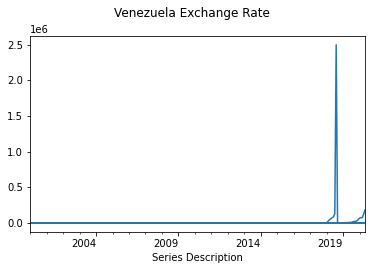

In [19]:
for x in df.columns:
    if x != 'Series Description':
        df[x].plot(title='{x} Exchange Rate'.format(x=x), subplots=True)

In [20]:
df.plot(x='Series Description',subplots=True, figsize =(18,50))    
plt.show

KeyError: 'Series Description'

In [ ]:
for i in Continents:
    i.plot(legend=True)
plt.show

In [ ]:
for i in df.columns:
    print(f'{i}:\n\tmin {df[i].min()} \n\tmax {df[i].max()}\n\tmean: {round(df[i].mean(), 4)}\n\tstd: {round(df[i].std(),4)}')


In [21]:
worst=[]
weakerecon=[]
modecon=[]
goodecon=[]
bestecon=[]
for i in df.columns:
    if df[i].max()>200:
        worst.append(i)
    elif (df[i].max()<200) & (df[i].max()>20):
         weakerecon.append(i)
    elif (df[i].max()<20) & (df[i].max()>8):
        modecon.append(i)
    elif (df[i].max()<8) & (df[i].max()>2):
        goodecon.append(i)
    if df[i].max()<2:
        bestecon.append(i)
print(f'Worsrt:{worst}\nWeak:{weakerecon}\nModerate:{modecon}\nGood:{goodecon}\nBest:{bestecon}')
dfworst=df[worst]
dfweak=df[weakerecon]
dfmod=df[modecon]
dfgood=df[goodecon]
dfbest=df[bestecon]
econ=[dfworst, dfweak, dfmod, dfgood, dfbest]

Worsrt:['Korea', 'Venezuela']
Weak:['India', 'Japan', 'Mexico', 'Sri Lanka', 'Taiwan', 'Thailand']
Moderate:['China', 'Denmark', 'Norway', 'Sweden', 'South Africa']
Good:['UK', 'Brazil', 'Hong Kong', 'Malaysia']
Best:['Australia', 'Euro', 'NEWZEALAND', 'Canada', 'Singapore', 'Switzerland']


<function matplotlib.pyplot.show(*args, **kw)>

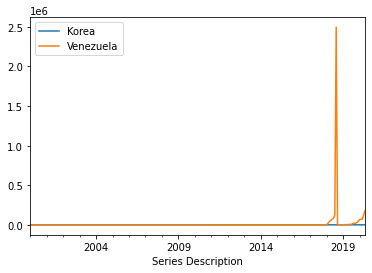

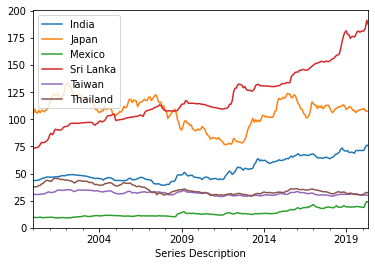

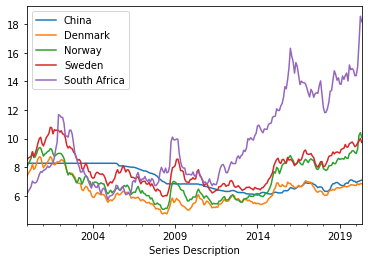

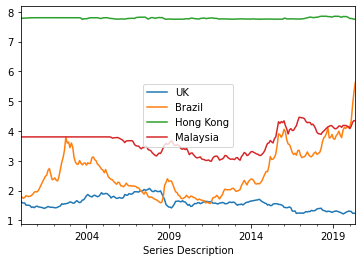

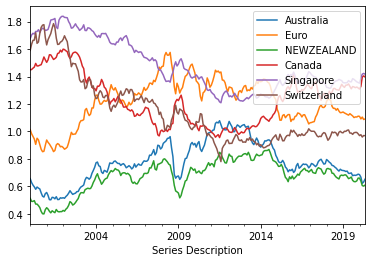

In [22]:
for i in econ:
    i.plot(legend=True)
plt.show

In [23]:
corr = df.corr()
plt.figure(figsize=(12,12))
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

TypeError: 'float' object cannot be interpreted as an integer

<Figure size 864x864 with 0 Axes>

In [ ]:
df.corr()

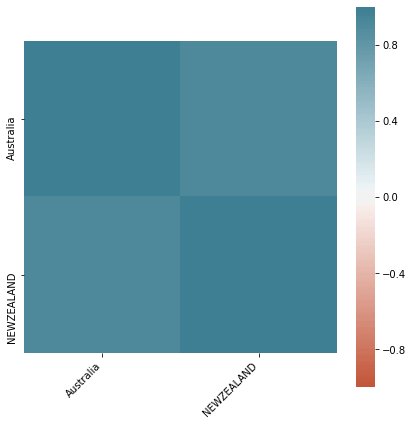

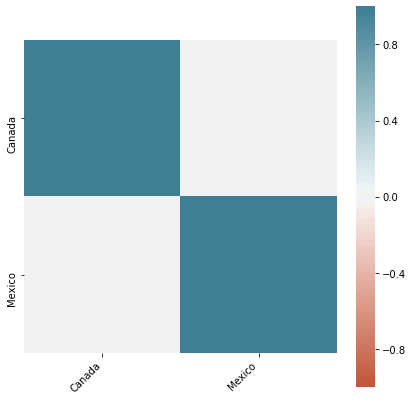

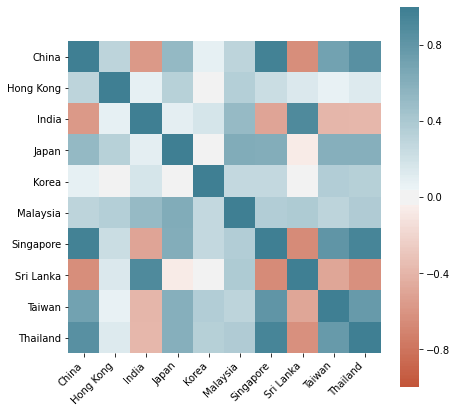

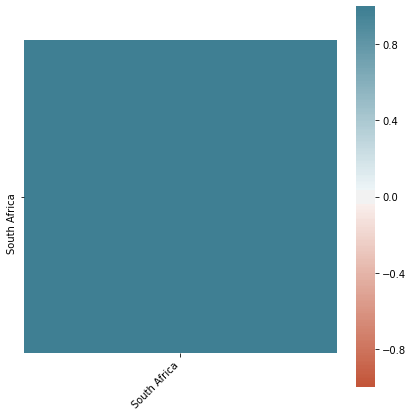

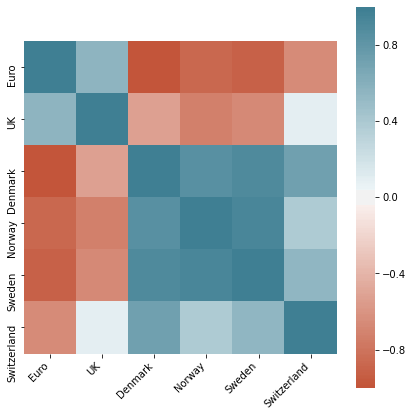

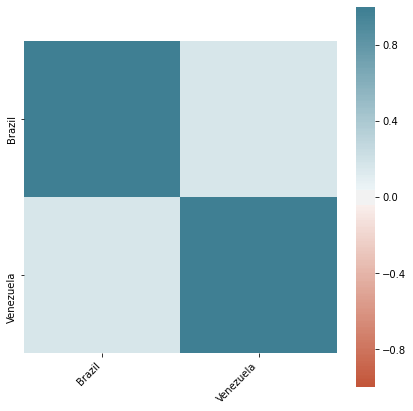

In [26]:
for i in Continents:
    corr = i.corr()
    plt.figure(figsize=(7,7))
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

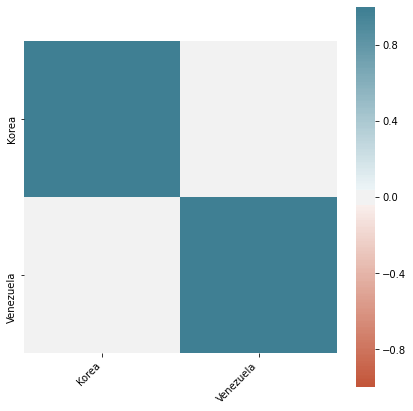

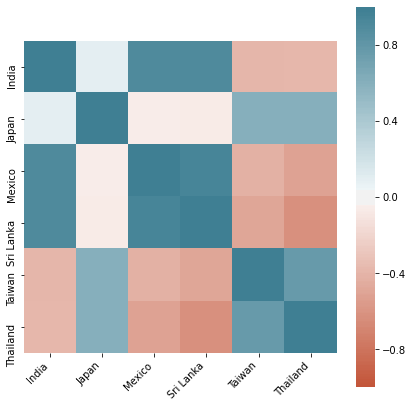

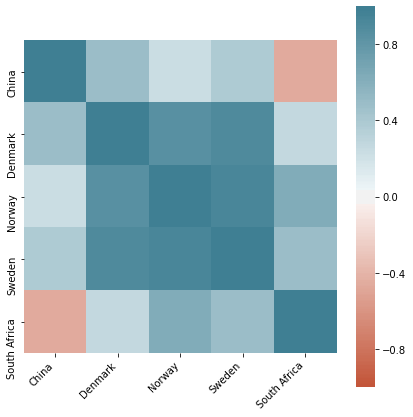

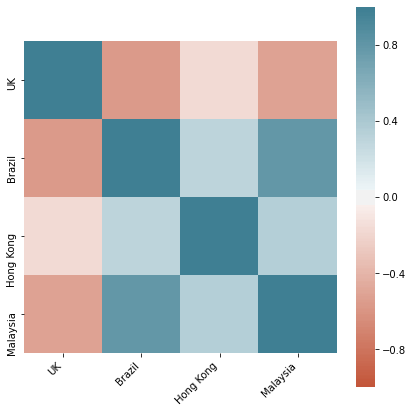

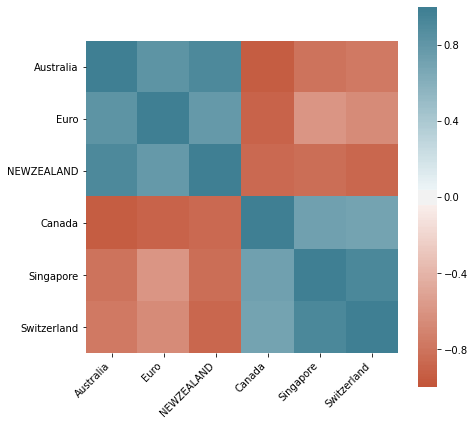

In [27]:
for i in econ:
    corr = i.corr()
    plt.figure(figsize=(7,7))
    ax = sns.heatmap(
        corr, 
        vmin=-1, vmax=1, center=0,
        cmap=sns.diverging_palette(20, 220, n=200),
        square=True
    )
    ax.set_xticklabels(
        ax.get_xticklabels(),
        rotation=45,
        horizontalalignment='right'
    );

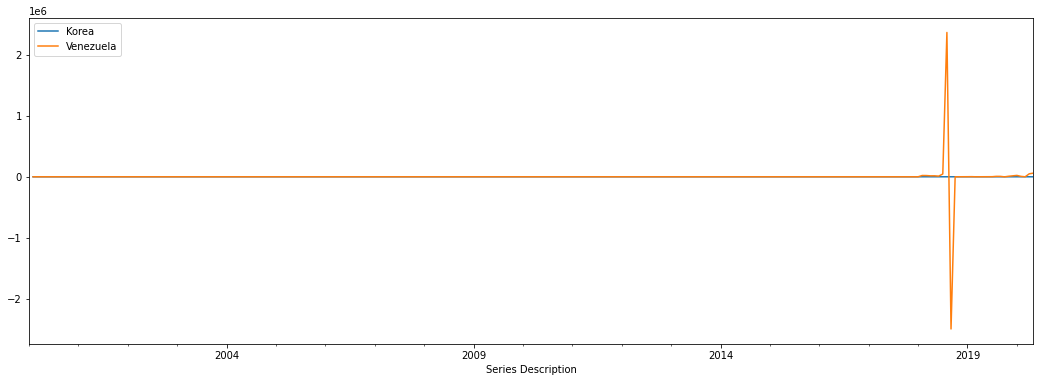

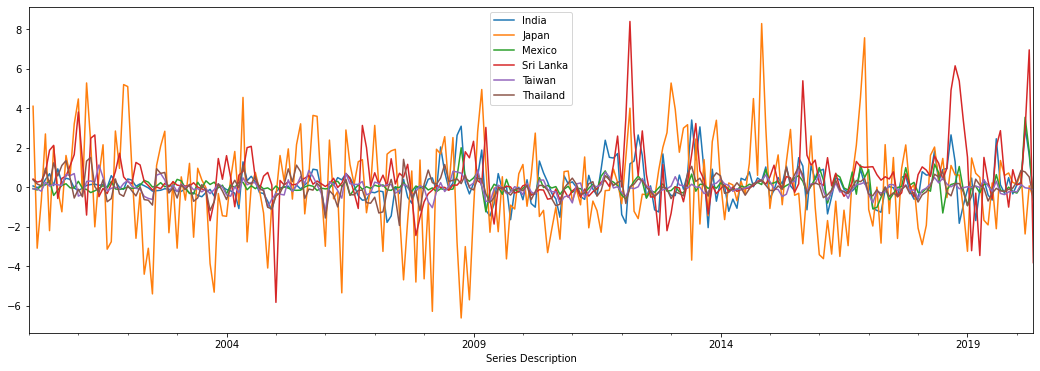

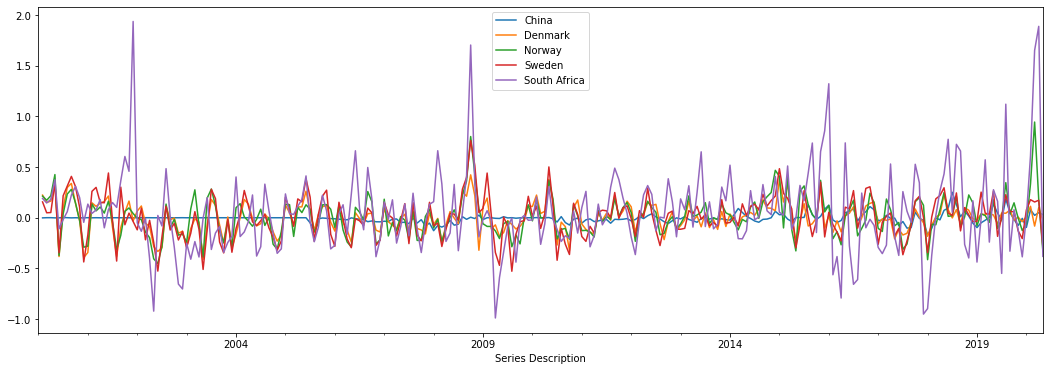

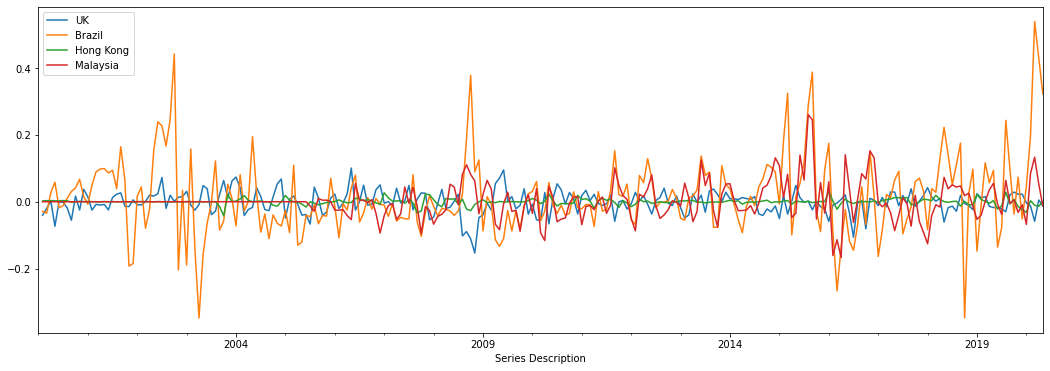

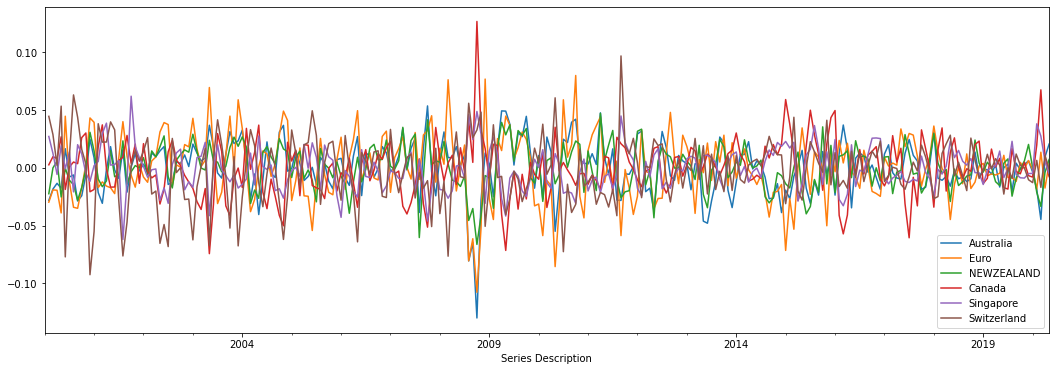

In [28]:
for i in econ:
    trends_diff = i.diff(periods=1)
    trends_diff.plot(figsize=(18,6), legend=True)

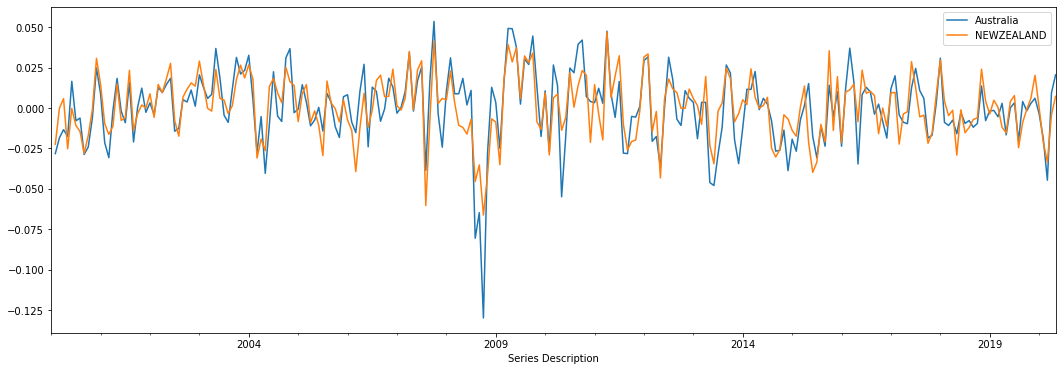

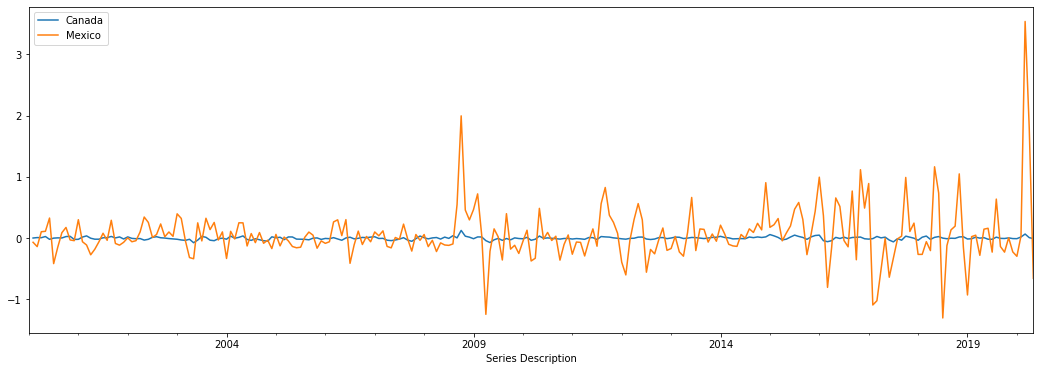

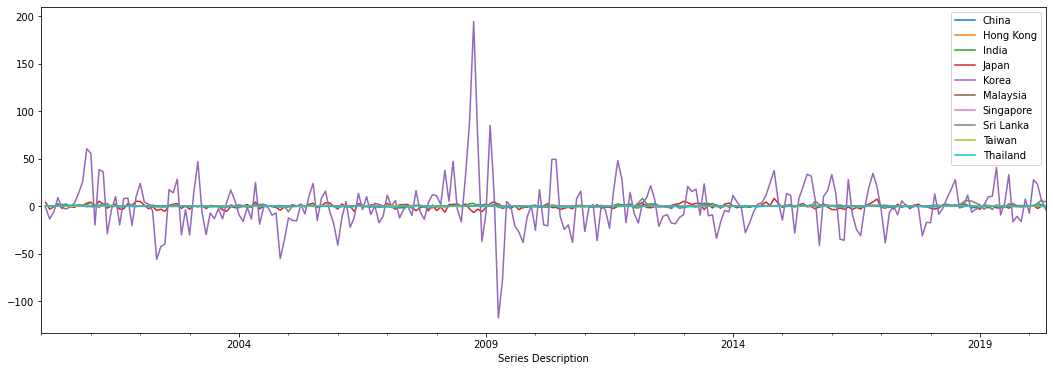

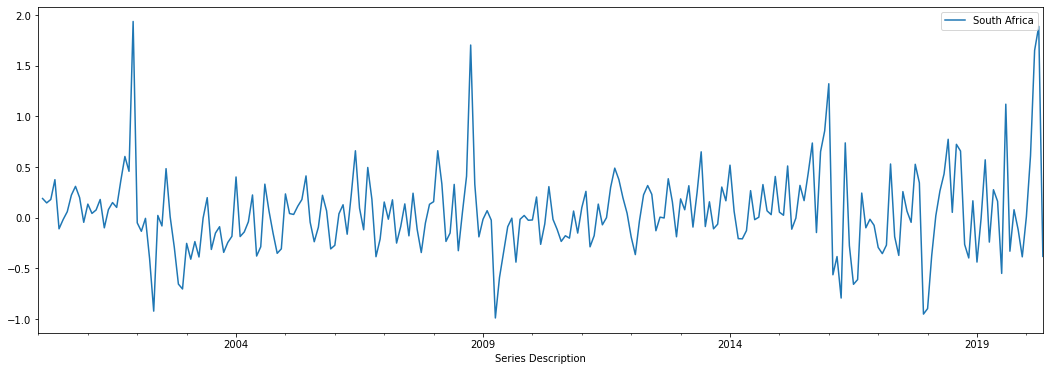

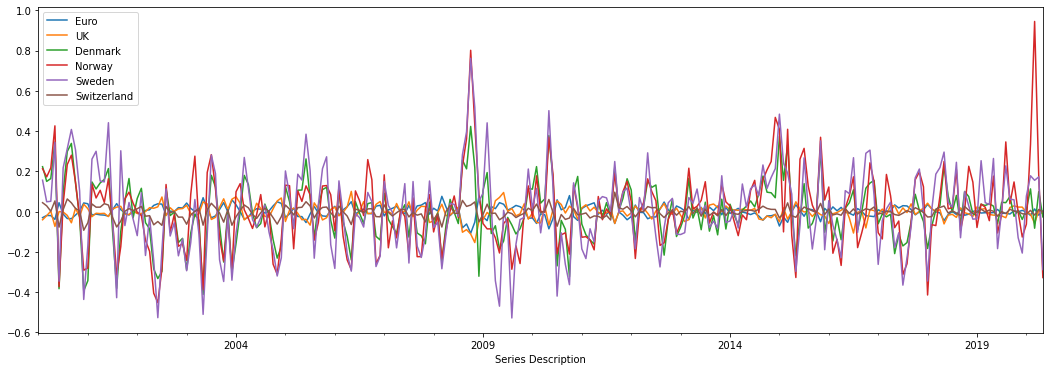

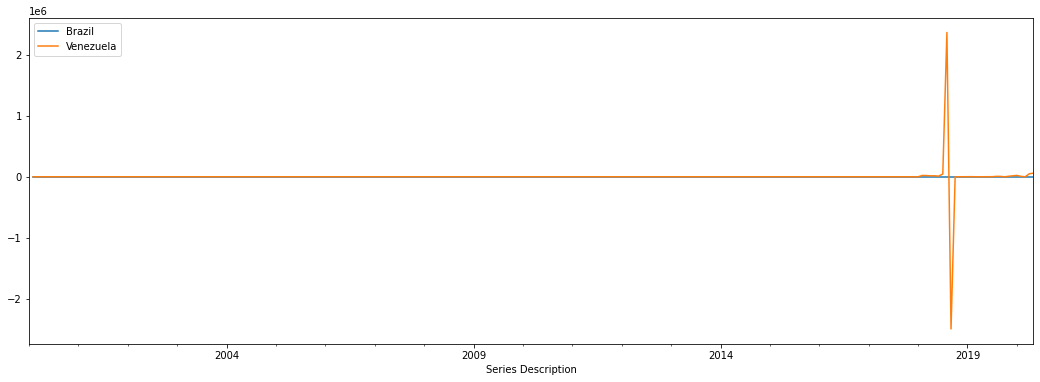

In [29]:
for i in Continents:
    trends_diff = i.diff(periods=1)
    trends_diff.plot(figsize=(18,6), legend=True)

In [30]:
bestecon

['Australia', 'Euro', 'NEWZEALAND', 'Canada', 'Singapore', 'Switzerland']

In [31]:
top3=['Australia', 'NEWZEALAND', 'Switzerland']

In [32]:
df[top3].corr()

,Australia,NEWZEALAND,Switzerland
Australia,1.000000,0.913211,-0.761322
NEWZEALAND,0.913211,1.000000,-0.876140
Switzerland,-0.761322,-0.876140,1.000000


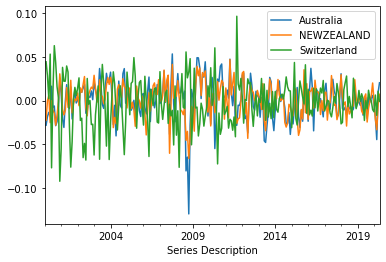

In [33]:
trends=df[top3].diff(periods=1)
trends.plot(legend=True)

dotted line represents statistical significance
strong autocorrelation

# Start of time Series

In [17]:
df.Australia

Series Description
2000-01-01    0.6560
2000-02-01    0.6278
2000-03-01    0.6094
2000-04-01    0.5960
2000-05-01    0.5784
               ...  
2020-01-01    0.6851
2020-02-01    0.6664
2020-03-01    0.6218
2020-04-01    0.6312
2020-05-01    0.6517
Name: Australia, Length: 245, dtype: float64

In [18]:
aus=df.Australia
type(aus[0])

numpy.float64

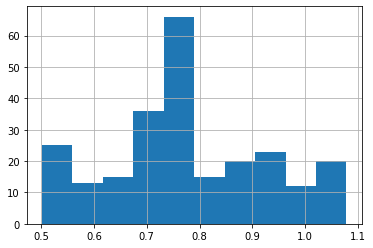

In [19]:
aus.hist(bins=10)

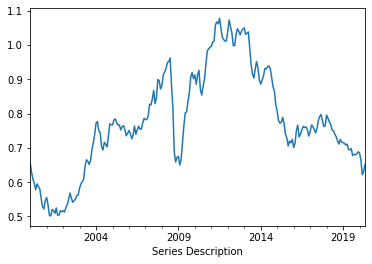

In [20]:
aus.plot()

In [21]:
rol6=aus.rolling(window=12, min_periods=6).mean()
rol6.tail(10)

Series Description
2019-08-01    0.707142
2019-09-01    0.703883
2019-10-01    0.701275
2019-11-01    0.697775
2019-12-01    0.695425
2020-01-01    0.692925
2020-02-01    0.688992
2020-03-01    0.681792
2020-04-01    0.675133
2020-05-01    0.671567
Name: Australia, dtype: float64

increasing the window flattens out the curve

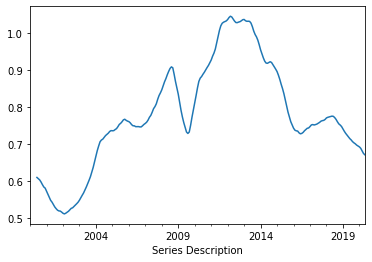

In [22]:
rol6.plot()

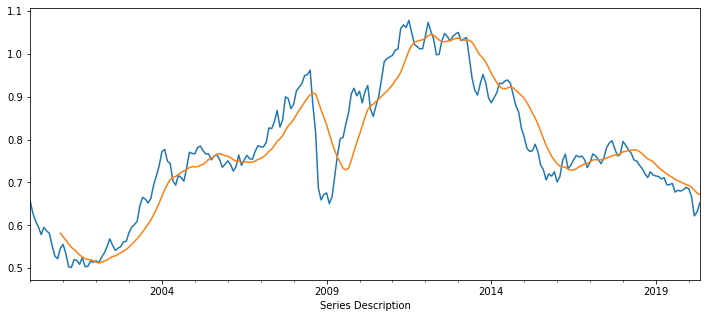

In [23]:
aus.plot(figsize=(12,5)).autoscale(axis='x',tight=True)
aus.rolling(window=12).mean().plot();

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: the 'freq' keyword is deprecated, use 'period' instead
  """Entry point for launching an IPython kernel.


<Figure size 432x288 with 0 Axes>

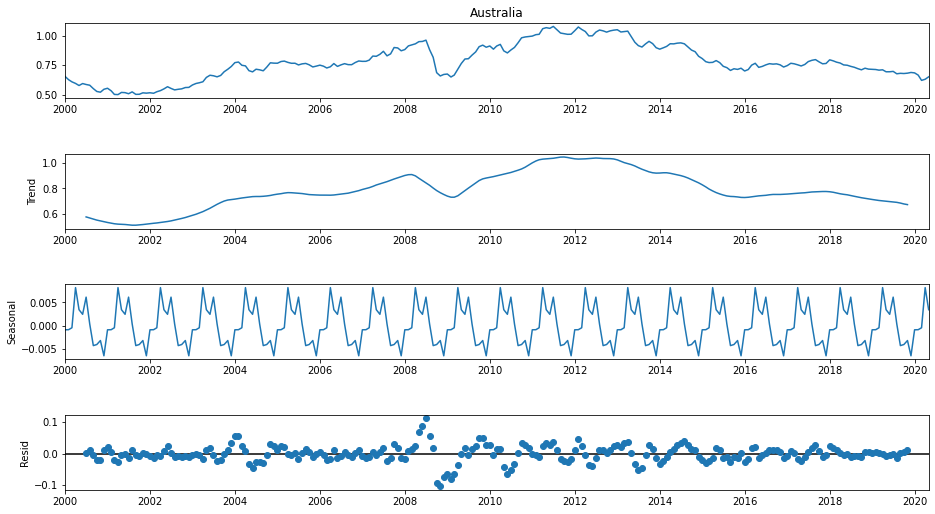

In [24]:
decomposition = seasonal_decompose(aus, freq=12 )
fig = plt.figure()
fig = decomposition.plot()
fig.set_size_inches(15, 8)

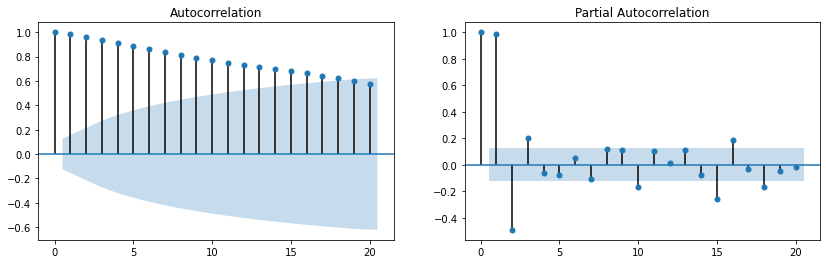

In [25]:
fig, ax = plt.subplots(1,2,figsize=(14,4))
plot_acf(aus, lags=20, ax=ax[0]);
plot_pacf(aus, lags=20, ax=ax[1]);

In [26]:
month_aus=aus.resample('M').sum()

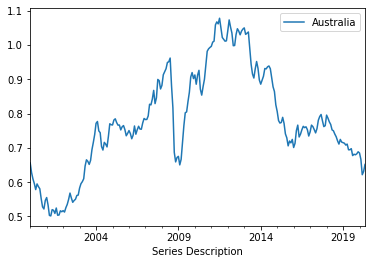

In [27]:
month_aus=pd.DataFrame(month_aus, columns=['Australia'])
month_aus.plot()

In [28]:

#create a function that will help us to quickly 
def test_stationarity(timeseries, window):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=window).mean()
    rolstd = timeseries.rolling(window=window).std()

    #Plot rolling statistics:
    fig = plt.figure(figsize=(12, 8))
    orig = plt.plot(timeseries.iloc[window:], color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show()
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput)

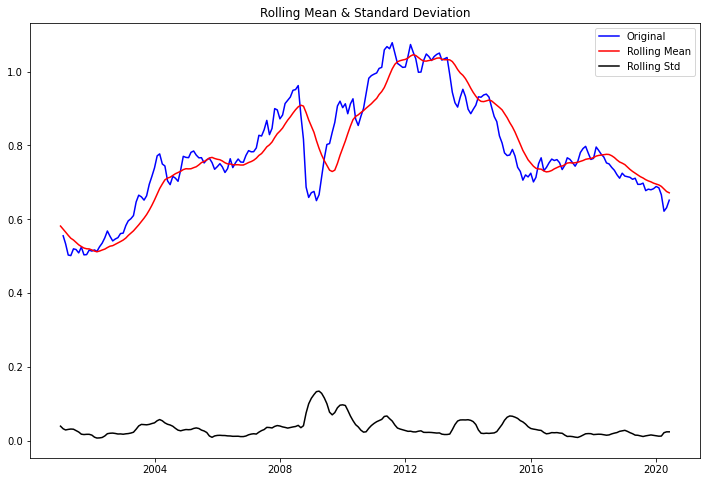

Results of Dickey-Fuller Test:
Test Statistic                  -1.637784
p-value                          0.463419
#Lags Used                       2.000000
Number of Observations Used    242.000000
Critical Value (1%)             -3.457664
Critical Value (5%)             -2.873559
Critical Value (10%)            -2.573175
dtype: float64


In [29]:
test_stationarity(month_aus.Australia,12)

Not stationary

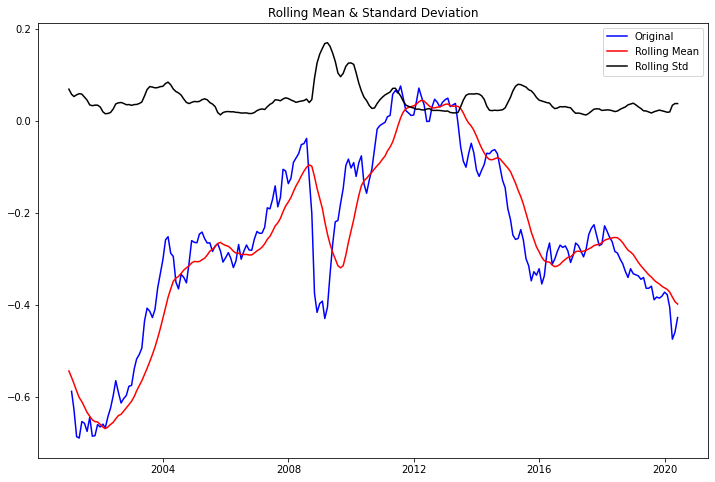

Results of Dickey-Fuller Test:
Test Statistic                  -1.722559
p-value                          0.419529
#Lags Used                       3.000000
Number of Observations Used    241.000000
Critical Value (1%)             -3.457779
Critical Value (5%)             -2.873609
Critical Value (10%)            -2.573202
dtype: float64


In [30]:
# log difference
month_aus['natural_log'] = month_aus.Australia.apply(lambda x: np.log(x))  
test_stationarity(month_aus.natural_log,12)

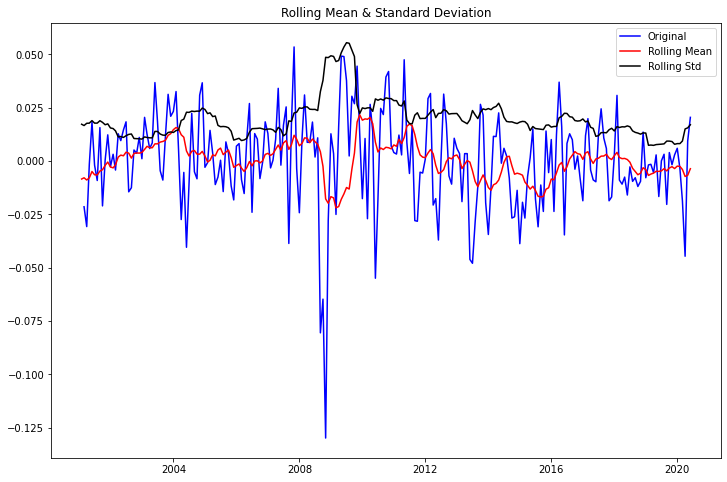

Results of Dickey-Fuller Test:
Test Statistic                -9.872983e+00
p-value                        3.949558e-17
#Lags Used                     1.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


In [31]:
# first difference
month_aus['first_difference'] = month_aus.Australia - month_aus.Australia.shift(1)  
test_stationarity(month_aus.first_difference.dropna(inplace=False),12)

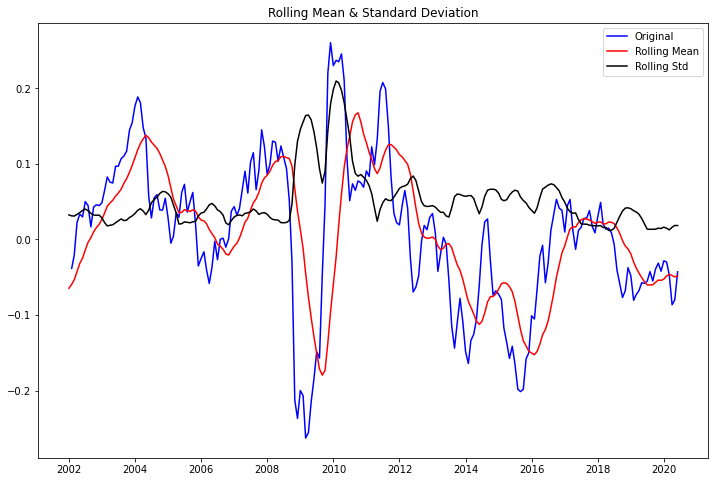

Results of Dickey-Fuller Test:
Test Statistic                  -2.529361
p-value                          0.108493
#Lags Used                      13.000000
Number of Observations Used    219.000000
Critical Value (1%)             -3.460567
Critical Value (5%)             -2.874830
Critical Value (10%)            -2.573853
dtype: float64


In [32]:
# seasonal difference
month_aus['seasonal_diff']= month_aus.Australia-month_aus.Australia.shift(12)
test_stationarity(month_aus.seasonal_diff.dropna(inplace=False),12)

## First Difference makes data most stationary

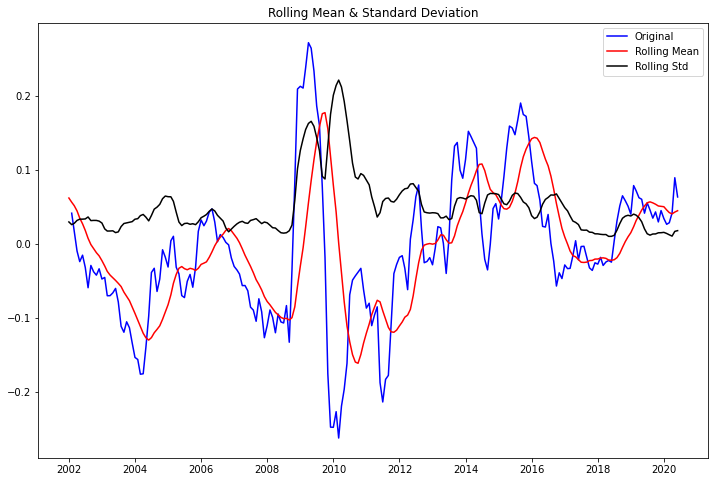

Results of Dickey-Fuller Test:
Test Statistic                  -2.888085
p-value                          0.046751
#Lags Used                      14.000000
Number of Observations Used    218.000000
Critical Value (1%)             -3.460708
Critical Value (5%)             -2.874891
Critical Value (10%)            -2.573886
dtype: float64


In [33]:
month_aus['seasonal_first_diff']=month_aus.first_difference-month_aus.seasonal_diff
test_stationarity(month_aus.seasonal_first_diff.dropna(inplace=False),12)

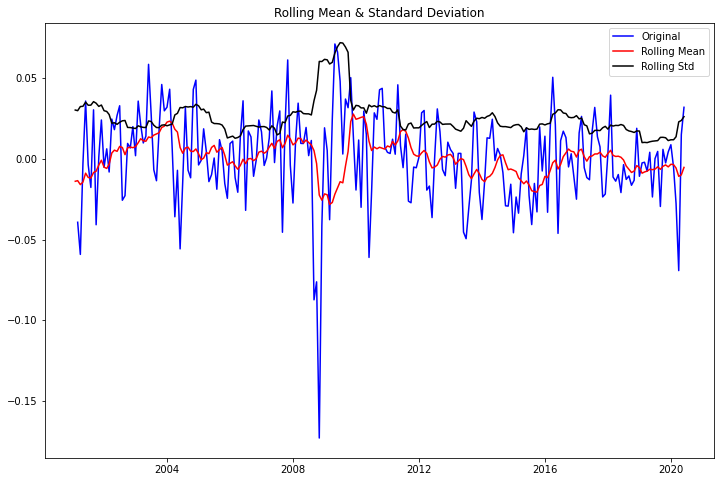

Results of Dickey-Fuller Test:
Test Statistic                -1.011277e+01
p-value                        9.903106e-18
#Lags Used                     1.000000e+00
Number of Observations Used    2.420000e+02
Critical Value (1%)           -3.457664e+00
Critical Value (5%)           -2.873559e+00
Critical Value (10%)          -2.573175e+00
dtype: float64


In [34]:
month_aus['log_first_difference'] = month_aus.natural_log - month_aus.natural_log.shift(1)  
month_aus['log_seasonal_first_difference'] = month_aus.log_first_difference - month_aus.log_first_difference.shift(12)  

test_stationarity(month_aus.log_first_difference.dropna(inplace=False), 12)

## natural log difference is most stationary

In [35]:
month_aus.first_difference.head()

Series Description
2000-01-31       NaN
2000-02-29   -0.0282
2000-03-31   -0.0184
2000-04-30   -0.0134
2000-05-31   -0.0176
Freq: M, Name: first_difference, dtype: float64

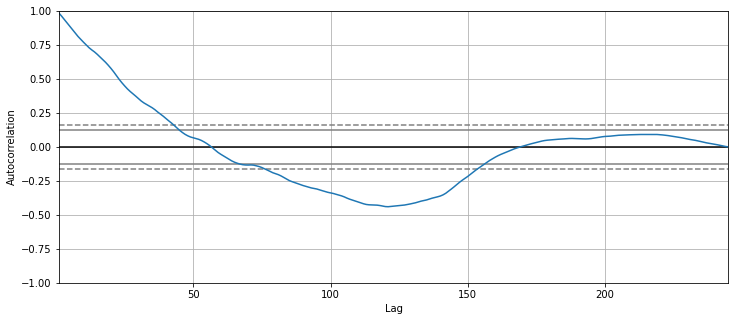

In [36]:
plt.figure(figsize=(12,5))
autocorrelation_plot(month_aus.Australia)

/Users/michaelarmistead/opt/anaconda3/lib/python3.7/site-packages/statsmodels/regression/linear_model.py:1406: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


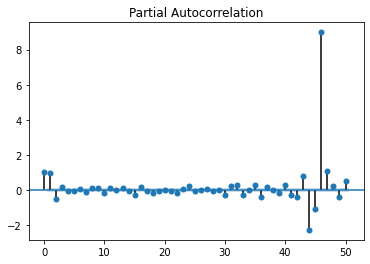

<Figure size 864x360 with 0 Axes>

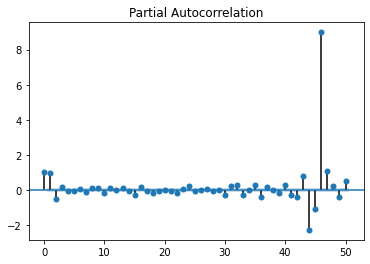

In [37]:
plt.figure(figsize=(12,5))
plot_pacf(month_aus.Australia, lags=50)

In [38]:
testresults=month_aus.Australia[-25:-1]
testresults

Series Description
2018-05-31    0.7525
2018-06-30    0.7498
2018-07-31    0.7403
2018-08-31    0.7325
2018-09-30    0.7206
2018-10-31    0.7111
2018-11-30    0.7247
2018-12-31    0.7169
2019-01-31    0.7151
2019-02-28    0.7136
2019-03-31    0.7082
2019-04-30    0.7111
2019-05-31    0.6945
2019-06-30    0.6946
2019-07-31    0.6978
2019-08-31    0.6775
2019-09-30    0.6815
2019-10-31    0.6798
2019-11-30    0.6827
2019-12-31    0.6887
2020-01-31    0.6851
2020-02-29    0.6664
2020-03-31    0.6218
2020-04-30    0.6312
Freq: M, Name: Australia, dtype: float64

In [39]:
def arimamod(data, p,d,q, start, end):
    mod=ARIMA(data, order = (p,d,q))
    fit=mod.fit()
    pred=fit.predict(start=start,end=end, dynamic=True)
    return pred

In [40]:
d=[0,1,2]
for i in d:
    pred=arimamod(month_aus.Australia, 0,i,0, '2018-05-31', '2020-04-30')
    mae=mean_absolute_error(testresults, pred)
    mse=mean_squared_error(testresults, pred)
    rmsq=np.sqrt(mean_squared_error(testresults, pred))
    print('Mean squared error', mse)
    print('Mean absolute error', mae)
    print('Root mean squared error', rmsq)

Mean squared error 0.006978454450007798
Mean absolute error 0.07734455741109977
Root mean squared error 0.08353714413365948
Mean squared error 0.4909042844224756
Mean absolute error 0.699934290154145
Root mean squared error 0.7006456197126159
Mean squared error 0.4905991127069737
Mean absolute error 0.6997162559338498
Root mean squared error 0.7004278069201519


In [41]:
p=[1,2]
for i in p:
    pred=arimamod(month_aus.Australia, i,0,0, '2018-05-31', '2020-04-30')
    mae=mean_absolute_error(testresults, pred)
    mse=mean_squared_error(testresults, pred)
    rmsq=np.sqrt(mean_squared_error(testresults, pred))
    print('Mean squared error', mse)
    print('Mean absolute error', mae)
    print('Root mean squared error', rmsq)

Mean squared error 0.004784616846664049
Mean absolute error 0.06286412877131924
Root mean squared error 0.06917092486488849
Mean squared error 0.004600418272718458
Mean absolute error 0.060837923206456535
Root mean squared error 0.0678263833085508


In [42]:

pred=arimamod(month_aus.Australia, 0,0,1, '2018-05-31', '2020-04-30')
mae=mean_absolute_error(testresults, pred)
mse=mean_squared_error(testresults, pred)
rmsq=np.sqrt(mean_squared_error(testresults, pred))
print('Mean squared error', mse)
print('Mean absolute error', mae)
print('Root mean squared error', rmsq)

Mean squared error 0.0068837507029958596
Mean absolute error 0.07659788412985812
Root mean squared error 0.08296837170269078


TypeError: the first argument to axis() must be an interable of the form [xmin, xmax, ymin, ymax]

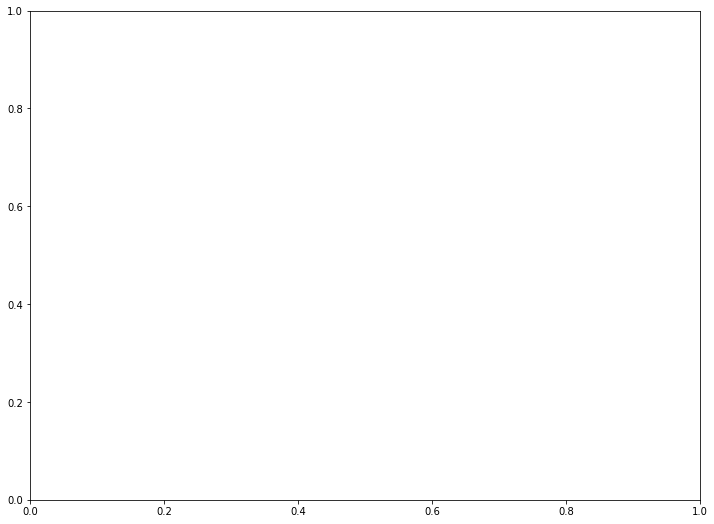

In [59]:
pred=arimamod(month_aus.Australia, 1,0,0, '2018-05-31', '2020-04-30')
plt.figure(figsize=(12,9))
plt.axis(['2018-05-31','2020-04-30'])
pred.plot()
month_aus.Australia.plot()